## Practise problem bmart sales - Source AV

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
train.describe()

/home/srik/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,NaN,0.026989,93.826500,1987.000000,834.247400
50%,NaN,0.053931,143.012800,1999.000000,1794.331000
75%,NaN,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
%matplotlib inline

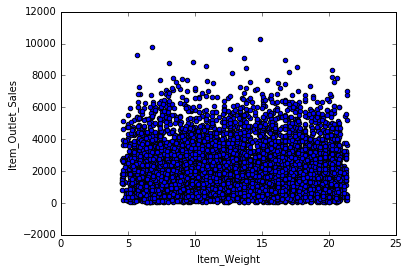

In [6]:
train.plot('Item_Weight', 'Item_Outlet_Sales', kind = 'scatter')

How should I interpret the above scatter plot?? Is it random scatter?. If so no correlation? Can I remove this feature??? What else needs to be considered??

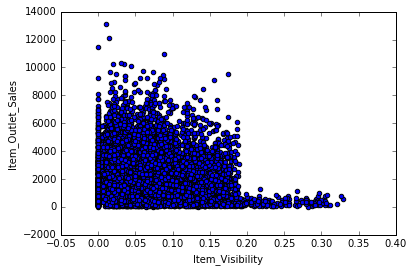

In [7]:
train.plot('Item_Visibility', 'Item_Outlet_Sales', kind = 'scatter')

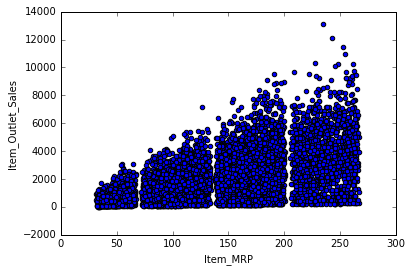

In [8]:
train.plot('Item_MRP', 'Item_Outlet_Sales', kind = 'scatter')

So is it like high MRP, high sales?? strange?

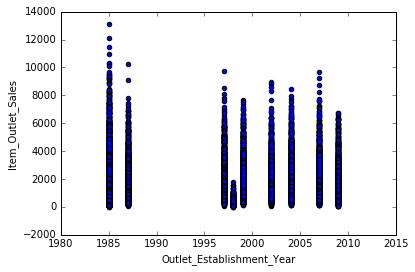

In [9]:
train.plot('Outlet_Establishment_Year', 'Item_Outlet_Sales', kind = 'scatter')

Can i say it as negatively correlated???

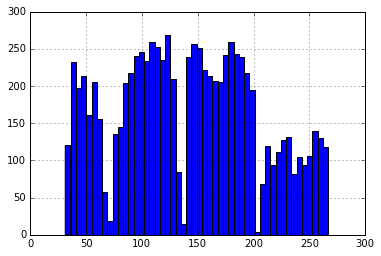

In [12]:
#hist and box plot to see the skewness, what if the data is not normal distributed??
#train.Item_Weight.hist(bins = 50)
#train.Item_Visibility.hist(bins = 50)
train.Item_MRP.hist(bins = 50)
#train.Outlet_Establishment_Year.hist(bins = 50)

In [5]:
#filling nan for itemweight
train.Item_Weight.fillna(train.Item_Weight.mean(), inplace=True)

In [6]:
#object variables
categorical_vars = train.dtypes.loc[train.dtypes=='object'].index
categorical_vars

Index([u'Item_Identifier', u'Item_Fat_Content', u'Item_Type',
       u'Outlet_Identifier', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type'],
      dtype='object')

In [5]:
train[categorical_vars].apply(lambda x:len(x.unique()))

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [7]:
#train.Outlet_Identifier.value_counts()
train.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace=True)
#train.head()

In [15]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
#replace redundant row values
train.Item_Fat_Content.replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
train.Item_Type.value_counts()/train.shape[0]

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

Is it ok to have these many categories??? how to handle??Get dummy variables and apply reguralization to get top priority features. Or can I combine low percentage values to others (like say <0.05??)

In [9]:
train.Item_Type.replace(['Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast', 'Seafood'], 'Others', inplace=True)
train.Item_Type.value_counts()

Others                   1381
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Name: Item_Type, dtype: int64

In [25]:
#train.Outlet_Size.value_counts()
#train.Outlet_Location_Type.value_counts()
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [36]:
#check for null values
train.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

How to fill these, is it reasonable to take mode for outlet size? Or should i take relation with other variables to fill these?

In [10]:
train.update(train.Outlet_Size.fillna(train.Outlet_Size.value_counts().index[0]))
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [40]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
test.Item_Weight.fillna(test.Item_Weight.mean(), inplace=True)
test.update(test.Outlet_Size.fillna(test.Outlet_Size.value_counts().index[0]))

In [12]:
#for regression, you need to object variables to numeric variables
#data processing for sklearn to handle
#object variable transformation to numeric
from sklearn.preprocessing import LabelEncoder
cat_vars = train.dtypes.loc[train.dtypes=='object'].index
le = LabelEncoder()
for cat in cat_vars:
    train[cat] = le.fit_transform(train[cat])
    test[cat] = le.fit_transform(test[cat])
#train.dtypes
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [13]:
from sklearn import linear_model
dependent_var = 'Item_Outlet_Sales'
independent_var = [x for x in train.columns if x not in ['Item_Outlet_Sales']]

In [48]:
type(independent_var)

list

In [49]:
regr = linear_model.LinearRegression()
regr.fit(train[independent_var], train[dependent_var])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
#test.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace=True)
#test.head()
test.predict = regr.predict(test[independent_var])

In [14]:
submission = pd.read_csv('SampleSubmission.csv')

In [54]:
submission.Item_Outlet_Sales = test.predict
submission.to_csv('submission2.csv')

In [56]:
regr2 = linear_model.Ridge(alpha = 0.1)
regr2.fit(train[independent_var], train[dependent_var])

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
test.predict = regr2.predict(test[independent_var])
submission.Item_Outlet_Sales = test.predict
submission.to_csv('submission3.csv')

Changed \alpha to 1, still no improvement in error???

pt) There are few algorithms which take categorical data directly!!!
pt) Though outlier removal is very important in regression techniques, advanced tree based algorithms are impervious to outliers. 
pt) Creating new features based on the given data definitely improves the performance model.

In [1]:
#DecisiontreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [15]:
regr3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [16]:
regr3.fit(train[independent_var], train[dependent_var])
test.predict = regr3.predict(test[independent_var])
submission.Item_Outlet_Sales = test.predict
submission.to_csv('submission4.csv')

# Pt) Random forest, GBM, XGBoost, Ensemble techniques can be used to improve the model

Need to check cross validation, also need some plots. Add functions to reduce the code. Need to find rmse and all.

In [22]:
from sklearn.ensemble import RandomForestRegressor
regr4 = RandomForestRegressor(n_estimators=200,max_depth=6, min_samples_leaf=100,n_jobs=4)

In [23]:
regr4.fit(train[independent_var], train[dependent_var])
test.predict = regr4.predict(test[independent_var])
submission.Item_Outlet_Sales = test.predict
submission.to_csv('submission5.csv')

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
regr5 = GradientBoostingRegressor(n_estimators=200, max_depth= 6)

In [28]:
regr5.fit(train[independent_var], train[dependent_var])
test.predict = regr5.predict(test[independent_var])
submission.Item_Outlet_Sales = test.predict
submission.to_csv('submission6.csv')

After modeling, interpretation is important. It is because based on the interpretation, preemptive analysis can be made. Feature importance can be analysed.

Target is changed to items sold = item_outlet-sales/item_mrp.
Later get the value of sales back by multiplying with mrp!!!

## Possible changes

1) Fat content for non consumable goods is also given. So, better take a none category.
2) Item_weight vs outlet indentifier to see for missing values and also see how it can be filled based on the relation with other items in the outlet. (Get a box plot and observe)
3) Year: instead of absolute year, the no of years before 2013 can be used,
4) Item_mrp vs density and see if you can get categories
5) Outlet identifier vs sales box plot
6) sales vs outlet type - box plot and grouping
7) Many of the visisbilities are zero, correct them to some other value
8) item identifiers - FD, drinks, nonconsumables